In [383]:
import numpy as np

import scipy
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import warnings
import pandas as pd
import statistics as st
from sympy.solvers import solve
from sympy import Symbol
from sklearn.utils.extmath import svd_flip
# warnings.filterwarnings('ignore')
import math
from sklearn.decomposition import PCA, KernelPCA

# Практическое задание 2
## Вариант 4

## Задание 1 

Рассмотрим данные:

|       | x<sub>1</sub> | x<sub>2</sub> | x<sub>3</sub> | x<sub>4</sub> | x<sub>5</sub> | x<sub>6</sub> | x<sub>7</sub> | x<sub>8</sub> |
| :---: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| **A** |      -10       |       -12.1      |       -12.1      |      -9.9       |      -9      |      -10.8      |      -12.1      |      -12.5      |
| **B** |      8       |       17.7      |       17.6      |      8.5       |      7.2      |      7.3      |      17.7      |      17.7      |

Есть ядро (функция сходства):
$$
K({\bf x}_i,{\bf x}_j)=||{\bf x}_i-{\bf x}_j||^2\\
$$

1. Построить диаграмму рассеяния точек **x<sub>i</sub>** (оси подписать, пронумеровать точки)
2. Рассчитать ядерную матрицу

1.1 Диаграмма рассеяния точек xi 

Номер точки= 1 Координаты:  -10.0 8.0
Номер точки= 2 Координаты:  -12.1 17.7
Номер точки= 3 Координаты:  -12.1 17.6
Номер точки= 4 Координаты:  -9.9 8.5
Номер точки= 5 Координаты:  -9.0 7.2
Номер точки= 6 Координаты:  -10.8 7.3
Номер точки= 7 Координаты:  -12.1 17.7
Номер точки= 8 Координаты:  -12.5 17.7


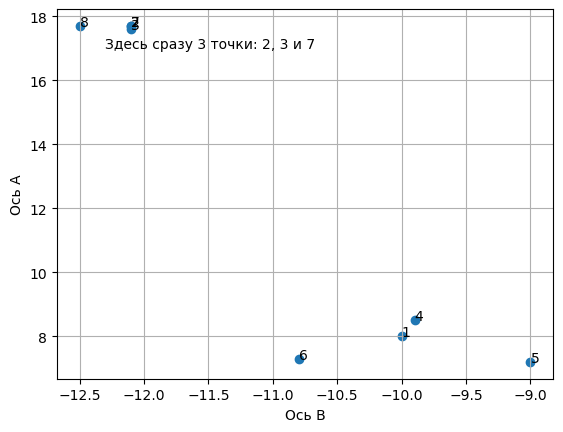

In [387]:
print("1.1 Диаграмма рассеяния точек xi \n")
A = np.array([-10,-12.1,-12.1,-9.9,-9,-10.8,-12.1,-12.5])
B = np.array([8,17.7,17.6,8.5,7.2,7.3,17.7,17.7])
D = np.stack([A, B]).T
N = 8 #количество
text = range(1,9)
plt.scatter(A,B) #диаграмма рассеяния
for i in text:
    plt.annotate(text[i-1], (A[i-1],B[i-1]))
    print("Номер точки=",text[i-1],"Координаты: ",A[i-1],B[i-1])
plt.text(-12.3,17,"Здесь сразу 3 точки: 2, 3 и 7")
plt.grid()
plt.xlabel("Ось B")
plt.ylabel("Ось A")
plt.show()

In [388]:
kernel = np.ndarray(shape=(D.shape[0], D.shape[0]), dtype=float)#ядерная матрица
for i, xi in enumerate(D):
    for j, xj in enumerate(D):
        dx = xi - xj
        kernel[i][j] = np.round((np.linalg.norm(dx) ** 2), 3)
print("1.2 Ядерная матрица \n\n",kernel)

  



1.2 Ядерная матрица 

 [[0.0000e+00 9.8500e+01 9.6570e+01 2.6000e-01 1.6400e+00 1.1300e+00
  9.8500e+01 1.0034e+02]
 [9.8500e+01 0.0000e+00 1.0000e-02 8.9480e+01 1.1986e+02 1.0985e+02
  0.0000e+00 1.6000e-01]
 [9.6570e+01 1.0000e-02 0.0000e+00 8.7650e+01 1.1777e+02 1.0778e+02
  1.0000e-02 1.7000e-01]
 [2.6000e-01 8.9480e+01 8.7650e+01 0.0000e+00 2.5000e+00 2.2500e+00
  8.9480e+01 9.1400e+01]
 [1.6400e+00 1.1986e+02 1.1777e+02 2.5000e+00 0.0000e+00 3.2500e+00
  1.1986e+02 1.2250e+02]
 [1.1300e+00 1.0985e+02 1.0778e+02 2.2500e+00 3.2500e+00 0.0000e+00
  1.0985e+02 1.1105e+02]
 [9.8500e+01 0.0000e+00 1.0000e-02 8.9480e+01 1.1986e+02 1.0985e+02
  0.0000e+00 1.6000e-01]
 [1.0034e+02 1.6000e-01 1.7000e-01 9.1400e+01 1.2250e+02 1.1105e+02
  1.6000e-01 0.0000e+00]]


## Задание 2
Рассмотрим данные в виде матрицы **D**:

| ***X<sub>1</sub>*** | ***X<sub>2</sub>*** |
| :-----------------: | :-----------------: |
|         -156         |         37         |
|         73         |         47         |
|         82         |         47         |
|         12         |         49         |
|         26         |         64         |
|         24         |         26         |
|         82         |         83         |
|         -99         |         80         |

1. Построить диаграмму рассеяния (оси подписать, пронумеровать точки)

2. Рассчитайте среднее **μ** для матрицы **D**, ковариационную матрицу **Σ** для матрицы **D** и ковариационную матрицу **Σ<sub>c</sub>**  для центрированной матрицы **D**

3. Рассчитайте собственные числа и собственные вектора для матрицы **Σ<sub>c</sub>**

4. Выведите индекс (порядковый номер), соответствующий первой главной компоненте

5. Рассчитайте первый главный компонент. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

6. Используя PCA из библиотеки sklearn, получите первую главную компоненту для матрицы **D**. Постройте точечный график полученного вектора (пронумеровать точки)

7. Визуально сравните графики, полученные в пунктах **5** и **6**. Убедитесь в корректности выполнения преобразований. Сохранен ли порядок точек? 

   Выведите название оси графика из пункта 1, проекция данных на которую сравнима с результатами PCA преобразований

8. **μ** и **Σ** сверху задают нормальное распределение, из которого были сгенерированы точки. Постройте диаграмму рассеяния, которая позволит определить ориентацию / размеры облака точек, полученного с помощью 2-мерной функции плотности вероятности. 

   На отдельном линейном графике постройте графики функций плотностей вероятности отдельных компонентов 2-мерного нормального распределения

2.1 Диаграмма рассеяния
Номер точки= 1 Координаты:  -156 37
Номер точки= 2 Координаты:  73 47
Номер точки= 3 Координаты:  82 47
Номер точки= 4 Координаты:  12 49
Номер точки= 5 Координаты:  26 64
Номер точки= 6 Координаты:  24 26
Номер точки= 7 Координаты:  82 83
Номер точки= 8 Координаты:  -99 80


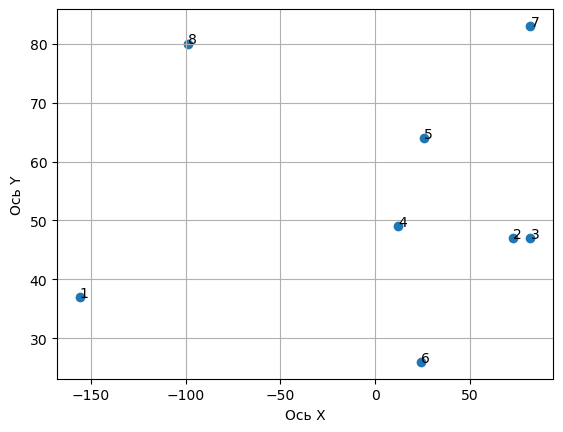

In [389]:
print("2.1 Диаграмма рассеяния")
X = np.array([-156, 73, 82, 12, 26, 24, 82, -99])
Y = np.array([37, 47, 47, 49, 64, 26, 83, 80])
for i in text:
    plt.annotate(text[i-1], (X[i-1],Y[i-1]))
    print("Номер точки=",text[i-1],"Координаты: ",X[i-1],Y[i-1])    
plt.grid()
plt.scatter(X,Y)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.show()

In [390]:
print("2.2")
print("Среднее μ")
D = np.stack([X, Y])
mulExValue = np.mean(D, axis=1)#двумерное мат. ожидание
print(mulExValue)

covarianceJ = np.cov(X, Y)
print("\nМатрица ковариации\n",covarianceJ)

center_function = lambda x: x - x.mean() #найти мат.ожидание в признаке
xCentr = center_function(X)#использую лямбда-функцию
yCentr = center_function(Y)#использую лямбда-функцию

nD = np.stack([xCentr, yCentr])
covarianceCentr=np.cov(xCentr, yCentr)#ковариация централизованной матрицы
#view updated Array
print("\nМатрица ковариации центрированная\n", covarianceCentr)
print("\nОНИ ОДИНАКОВЫЕ, так как от изменения координат ковариация не меняется")

2.2
Среднее μ
[ 5.5   54.125]

Матрица ковариации
 [[7724.          127.64285714]
 [ 127.64285714  401.83928571]]

Матрица ковариации центрированная
 [[7724.          127.64285714]
 [ 127.64285714  401.83928571]]

ОНИ ОДИНАКОВЫЕ, так как от изменения координат ковариация не меняется


In [391]:
print("2.3")
ev, vecs = np.linalg.eig(np.cov(xCentr, yCentr))#получение собственных чисел и соот. им векторов
print("Собственные числа от центрированной матрицы ковариации:\n", ev)
print("\nСобственные векторы от центрированной матрицы ковариации:\n",vecs)

2.3
Собственные числа от центрированной матрицы ковариации:
 [7726.22444596  399.61483975]

Собственные векторы от центрированной матрицы ковариации:
 [[ 0.99984818 -0.01742446]
 [ 0.01742446  0.99984818]]


In [392]:
print("2.4")
index = -1
#выбор индекса, чье собственное число больше из 2 признаков
if ev[0] > ev[1]:
    index = 0;
    print("индекс первой главной компоненты 0")
else:
    index = 1
    print("индекс первой главной компоненты 1")

2.4
индекс первой главной компоненты 0


2.5
[0.99984818 0.01742446]
[[-161.5     67.5     76.5      6.5     20.5     18.5     76.5   -104.5  ]
 [ -17.125   -7.125   -7.125   -5.125    9.875  -28.125   28.875   25.875]]
Первая главная компонента
 [-161.77387541   67.36560302   76.36423666    6.40971281   20.66895431
   18.00712835   76.99151733 -104.03327709]


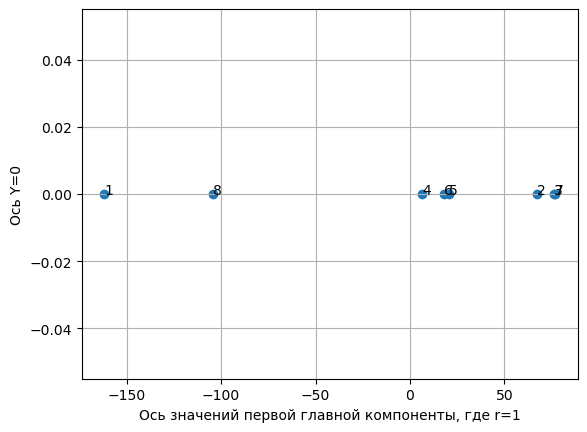

In [393]:
print("2.5")
   
v = vecs[:,index] #новый вектор длины 1 от большего собственного числа
print(v)
print(nD)
PC1 = np.dot(v.T,nD) #вектор главной компоненты
print("Первая главная компонента\n",PC1)
for i in text:
    plt.annotate(text[i-1], (PC1[i-1],arrY[i-1]))
arrY=np.zeros(8)
plt.grid()
plt.scatter(PC1,arrY)   
plt.xlabel("Ось значений первой главной компоненты, где r=1")
plt.ylabel("Ось Y=0")
plt.show()

2.6
Первая главная компонента
 [-161.77387541   67.36560302   76.36423666    6.40971281   20.66895431
   18.00712835   76.99151733 -104.03327709]


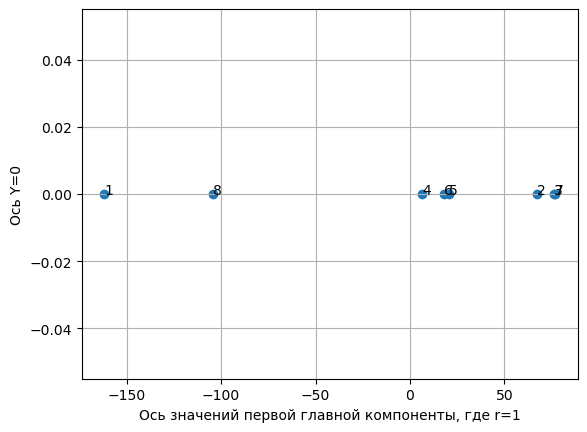

In [394]:
print("2.6")

pcaLearn = PCA(n_components=1)#алгоритм PCA из библиотеки sklearn
xPcaRed=pcaLearn.fit_transform(np.transpose(nD))
comp1=-xPcaRed[:,0]
print("Первая главная компонента\n",comp1)
for i in text:
    plt.annotate(text[i-1], (comp1[i-1],arrY[i-1]))
plt.grid()
plt.scatter(comp1, arrY)
plt.xlabel("Ось значений первой главной компоненты, где r=1")
plt.ylabel("Ось Y=0")
plt.show()

In [395]:
print("2.7")
print("Визуально графики совпали, порядок точек сохранен")
print("Ось X проекция данных на которую сравнима с результатами PCA преобразований")

2.7
Визуально графики совпали, порядок точек сохранен
Ось X проекция данных на которую сравнима с результатами PCA преобразований


2.8



Text(0, 0.5, 'Ось Y')

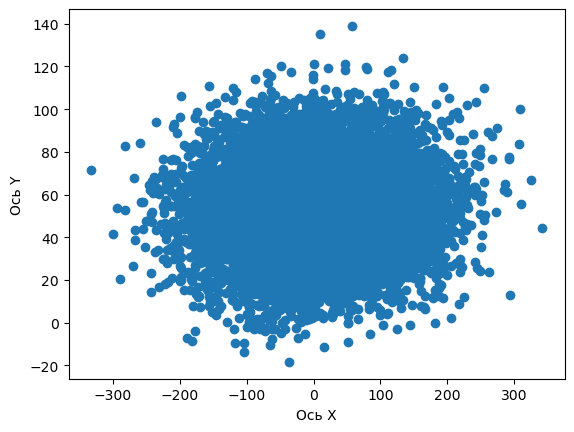

In [396]:
print("2.8")
print()
meanX = np.array([np.mean(X),np.mean(Y)])
xDop, yDop = np.random.multivariate_normal(meanX, np.cov(nD), 10000).T
# plt.grid()
plt.scatter(xDop, yDop)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")


2.8 Продолжение 


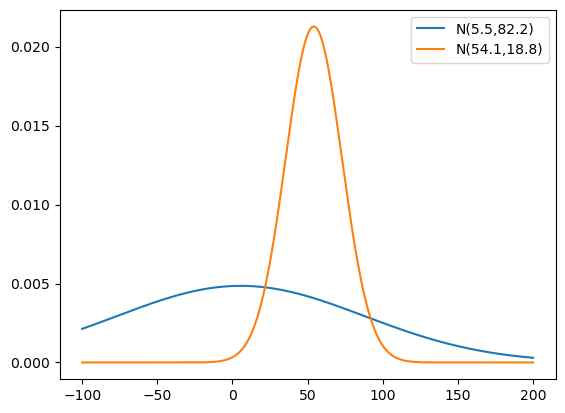

In [397]:
print("2.8 Продолжение ")
xN = np.linspace(-100, 200, 10000)
yN1 = stats.norm.pdf(xN, np.mean(X), np.std(X))
yN2 = stats.norm.pdf(xN, np.mean(Y), np.std(Y))

#графики функций плотностей вероятности отдельных компонентов
plt.plot(xN, yN1, label = "N(" + str(np.mean(X))+","+ str(round(np.std(X),1))+")")
plt.plot(xN, yN2, label = "N(" + str(round(np.mean(Y),1))+","+ str(round(np.std(Y),1))+")");

plt.legend();

## Задание 3

1. Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании для заданного ядра. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)
2. Используя KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1, получите первую главную компоненту для данных из первого задания. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)
3. Визуально сравните графики, полученные в пунктах **1** и **2**. Определите, использование какого ядра (из первого задания или ядра Гаусса) позволяет, на ваш взгляд, лучше визуально выделить принадлежность точки к одному из двух кластеров

3.1
Вывод работы самописного kernelpca


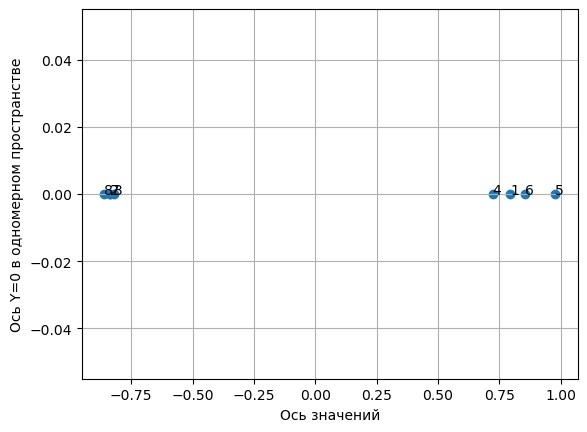

In [407]:
print("3.1")

n = kernel.shape[0]
E = np.ones(shape=(n,n))#полностью еденичная матрица размерностью n*n
I = np.eye(n,n)#на диагонале еденицы 

coef = (I - (1/n)*E)# получение коэф согласно формуле из методички
kernelCentr = np.dot(np.dot(coef,kernel),coef)#формула для ядерной матрицы с перемножением матрицы coef kernel coef

evK, vecsK = np.linalg.eig(kernelCentr)# собственные вектора и числа

absEvK=abs(evK)
valIndex = np.argmax(absEvK)#индекс наиб. собст. числа
val = max(absEvK)

tempArray = vecsK[valIndex]

vK = vecsK[:,valIndex]
newvK=-abs(vK)
KPC1 = np.dot(newvK.T,kernelCentr)#перевод в 1 пространство

plt.scatter(KPC1,arrY) 
for i in text:
    plt.annotate(text[i-1], (KPC1[i-1],arrY[i-1]))
plt.grid()
plt.xlabel("Ось значений")
plt.ylabel("Ось Y=0 в одномерном пространстве")
print("Вывод работы самописного kernelpca")

3.2
KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1


Text(0, 0.5, 'Ось Y=0 в одномерном пространстве')

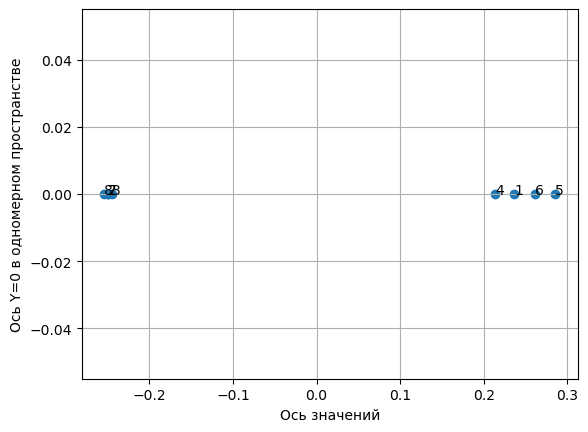

In [408]:
print("3.2")

KPCA=KernelPCA(n_components=1,  kernel='rbf', gamma=1)#берем с гауссовым ядром и гамма =1
KPCAred=KPCA.fit_transform(D)
ki = np.array(KPCAred[:,0])[np.newaxis]
pi = -np.array(vecsK[:,valIndex])[np.newaxis]
resi = np.dot(ki.T, pi)


print("KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1")
plt.grid()
plt.scatter(resi.T[:,0],arrY)
for i in text:
    plt.annotate(text[i-1], (resi.T[:,0][i-1],arrY[i-1]))
plt.xlabel("Ось значений")
plt.ylabel("Ось Y=0 в одномерном пространстве")


In [406]:
print("3.3")

print("Оба метода выделели данные в 2 кластера, особенностью KernelPCA с ядром Гаусса и гаммой = 1 это равномерное")
print("распределение точек в рамках кластера, что визуально понятнее с точки зрения человека")


3.3
Оба метода выделели данные в 2 кластера, особенностью KernelPCA с ядром Гаусса и гаммой = 1 это равномерное
распределение точек в рамках кластера, что визуально понятнее с точки зрения человека


## Для справки

1. Машинное обучение. Учебное пособие. Темы: 
   - Ядерные методы. Ядерные матрицы. Гауссово ядро
   - Снижение размерности. Метод главных компонент. Алгоритм 3.1
   - Ядерный анализ главных компонент. Алгоритм 3.2
2. [Как работает метод главных компонент (PCA) на простом примере](https://habr.com/ru/post/304214/)
3. [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), [RBF kernel](https://scikit-learn.org/stable/modules/metrics.html#rbf-kernel)